<center><h1> Clusterization </h1></center>

# 1. Information

https://archive.ics.uci.edu/ml/datasets/Yeast  
Predicted Attribute: Localization site of protein. ( non-numeric ).

The references below describe a predecessor to this dataset and its development. They also give results (not cross-validated) for classification by a rule-based expert system with that version of the dataset.

Reference: "Expert Sytem for Predicting Protein Localization Sites in Gram-Negative Bacteria", Kenta Nakai & Minoru Kanehisa, PROTEINS: Structure, Function, and Genetics 11:95-110, 1991.

Reference: "A Knowledge Base for Predicting Protein Localization Sites in Eukaryotic Cells", Kenta Nakai & Minoru Kanehisa, Genomics 14:897-911, 1992.


Attribute Information:

1. Sequence Name: Accession number for the SWISS-PROT database
2. mcg: McGeoch's method for signal sequence recognition.
3. gvh: von Heijne's method for signal sequence recognition.
4. alm: Score of the ALOM membrane spanning region prediction program.
5. mit: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins.
6. erl: Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute.
7. pox: Peroxisomal targeting signal in the C-terminus.
8. vac: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.
9. nuc: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.

# 2. Fetching Data:

## 2.1 Import packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline
import warnings
import math
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')


## 2.2 Import data

In [2]:
data=pd.read_csv("yeast.data", sep='\s+', na_values='None',
                 names=['ser_name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class'])

In [3]:
data.head(5)

,ser_name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [4]:
data.tail(5)

,ser_name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC
1483,G6PD_YEAST,0.65,0.54,0.54,0.13,0.5,0.0,0.53,0.22,CYT


# 3. Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
ser_name    1484 non-null object
mcg         1484 non-null float64
gvh         1484 non-null float64
alm         1484 non-null float64
mit         1484 non-null float64
erl         1484 non-null float64
pox         1484 non-null float64
vac         1484 non-null float64
nuc         1484 non-null float64
class       1484 non-null object
dtypes: float64(8), object(2)
memory usage: 116.1+ KB


In [6]:
data['ser_name'].value_counts()

RS4E_YEAST    2
RS22_YEAST    2
H4_YEAST      2
RL18_YEAST    2
EF1A_YEAST    2
             ..
PRC2_YEAST    1
YCK1_YEAST    1
CYBM_YEAST    1
CC46_YEAST    1
ATN2_YEAST    1
Name: ser_name, Length: 1462, dtype: int64

Судя по номеру доступа для базы данных SWISS-PROT (переменная *'ser_name'*), в датасете есть повторения.

In [7]:
data=data.drop_duplicates()

In [8]:
data['ser_name'].value_counts()

PH85_YEAST    1
YCK2_YEAST    1
RTPT_YEAST    1
SLA2_YEAST    1
GAR1_YEAST    1
             ..
AP19_YEAST    1
BCK1_YEAST    1
R16A_YEAST    1
MS16_YEAST    1
ATN2_YEAST    1
Name: ser_name, Length: 1462, dtype: int64

In [9]:
data=data.drop('ser_name', axis=1)

In [10]:
data.shape

(1462, 9)

# 4. EDA

## 4.1 Target variable *'class'*

In [11]:
data['class'].value_counts()

CYT    444
NUC    426
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class, dtype: int64

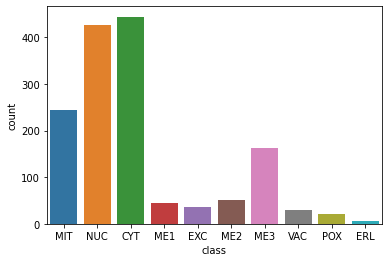

In [12]:
sns.countplot(x='class',data=data, orient='v')

## 4.2 Base statistics and distributions

In [13]:
data.describe(percentiles = [0.5, 0.25, 0.75, 0.95])

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,0.500534,0.500999,0.498564,0.260684,0.504788,0.007613,0.500855,0.277216
std,0.137581,0.124022,0.085332,0.136743,0.048710,0.076245,0.056412,0.106469
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.450000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
95%,0.770000,0.730000,0.620000,0.540000,0.500000,0.000000,0.570000,0.490000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCFD808>,
      dtype=object)

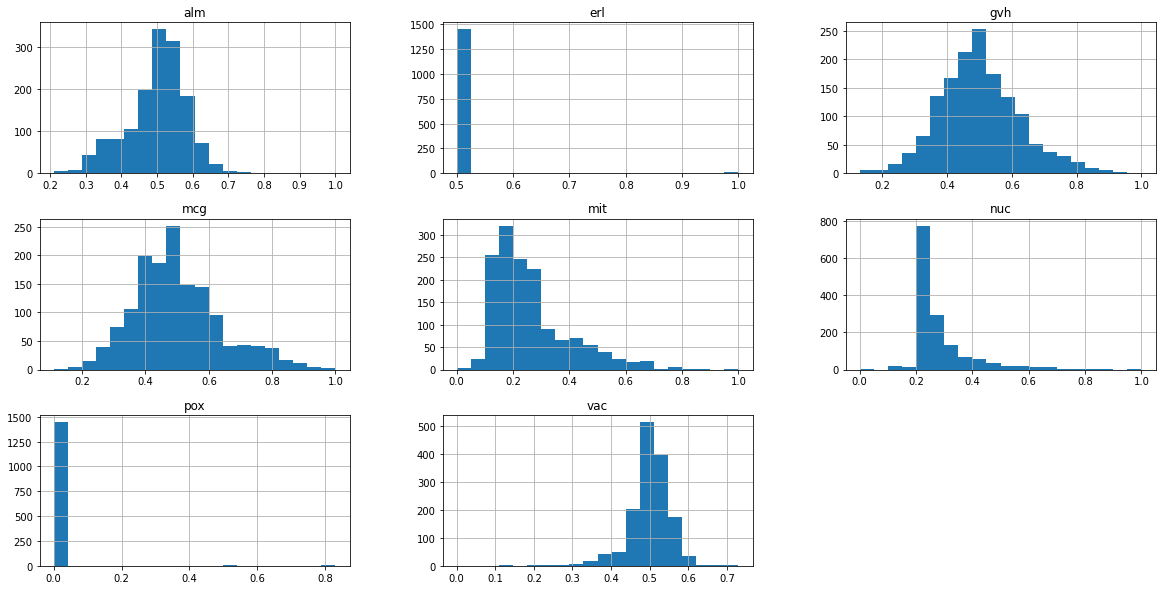

In [14]:
data.drop('class', axis=1).hist(figsize=(20,10), bins=20)

Большая часть переменных имеют распределения близкие к нормальному. Опасение вызываюут признаки *'pox'* и *'erl'*

## 4.3 Outlier processing

## 4.3.1 *'pox'* variable

In [15]:
data['pox'].value_counts()

0.00    1447
0.83      11
0.50       4
Name: pox, dtype: int64

In [16]:
data.loc[data['pox']==0.83]

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
84,0.67,0.62,0.40,0.43,0.5,0.83,0.50,0.22,MIT
175,0.44,0.38,0.48,0.32,0.5,0.83,0.53,0.22,POX
250,0.44,0.53,0.52,0.23,0.5,0.83,0.51,0.22,POX
319,0.69,0.60,0.51,0.13,0.5,0.83,0.52,0.22,POX
558,0.68,0.58,0.51,0.19,0.5,0.83,0.54,0.22,POX
592,0.42,0.50,0.53,0.22,0.5,0.83,0.50,0.22,POX
609,0.60,0.51,0.60,0.38,0.5,0.83,0.52,0.24,MIT
720,0.49,0.27,0.57,0.18,0.5,0.83,0.54,0.22,POX
1145,0.32,0.68,0.51,0.16,0.5,0.83,0.55,0.22,POX
1388,0.40,0.40,0.43,0.19,0.5,0.83,0.48,0.22,POX


In [17]:
data.loc[data['pox']==0.5]

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
110,0.45,0.41,0.50,0.46,0.5,0.5,0.50,0.27,POX
229,0.37,0.53,0.60,0.19,0.5,0.5,0.42,0.22,POX
759,0.48,0.52,0.49,0.35,0.5,0.5,0.51,0.22,MIT


Переменная *’pox’* - уникальный признак для класса *pox*, поскольку 12 представителей данного класса (из 20, входящих в данный датасет) имеют значения отличные от нуля. Поэтому выбросы из этой переменной убирать нельзя. 

## 4.3.2 *'erl'* variable

In [18]:
data['erl'].value_counts()

0.5    1448
1.0      14
Name: erl, dtype: int64

In [19]:
data.loc[data['erl']==1.0]

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
219,0.78,0.74,0.58,0.25,1.0,0.0,0.53,0.22,ERL
304,0.77,0.80,0.51,0.40,1.0,0.0,0.54,0.22,ERL
306,0.35,0.46,0.49,0.15,1.0,0.0,0.55,0.35,CYT
395,0.56,0.57,0.63,0.39,1.0,0.0,0.59,0.40,NUC
488,0.85,0.56,0.33,0.38,1.0,0.0,0.55,0.25,ERL
500,0.43,0.52,0.53,0.52,1.0,0.0,0.49,0.22,CYT
506,0.86,0.92,0.50,0.37,1.0,0.0,0.53,0.32,ERL
659,0.53,0.41,0.50,0.24,1.0,0.0,0.47,0.22,CYT
707,0.69,0.62,0.49,0.00,1.0,0.0,0.47,0.22,NUC
739,0.70,0.84,0.49,0.28,1.0,0.0,0.58,0.22,ERL


Переменная *’erl’* - уникальный признак для класса *erl*, поскольку 5 представителей данного класса (из 5, входящих в данный датасет) имеют значения отличные от 0.5. Поэтому выбросы из этой переменной убирать нельзя. 

## 4.4 Correlation analysis

(8.5, -0.5)

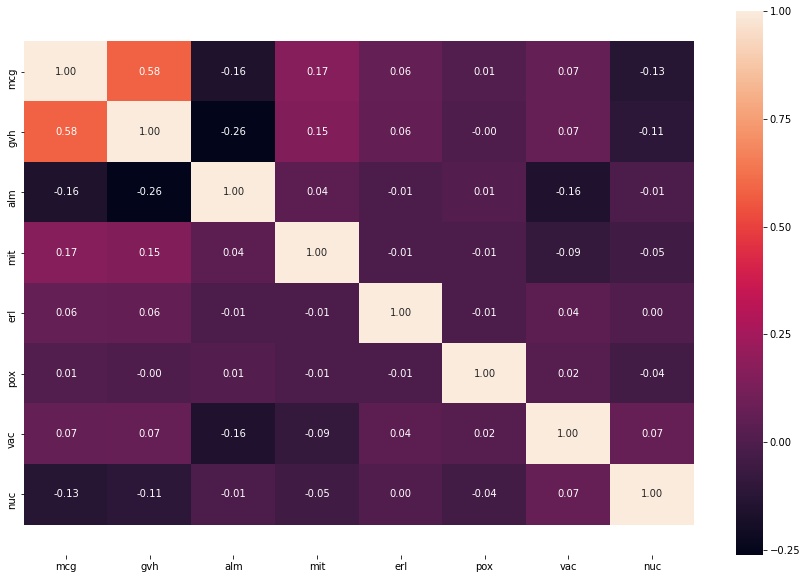

In [20]:
Corr =  data.dropna().corr()
plt.figure(figsize=(15,10));
ax=sns.heatmap(Corr, annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Сильной корреляции между признаками не наблюдается. Да и для нелинейной модели, такой как *Gradient Boost*, это не столь важно.

# 5 Machine learning 

## 5.1 Import packages

In [21]:
import umap
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, pairwise_distances

## 5.2 Delete target variable and Scaling Data

In [22]:
data_class=data.drop('class', axis=1)

In [23]:
data_class.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22


In [24]:
le = preprocessing.LabelEncoder()
le.fit(['CYT', 'NUC', 'MIT', 'ME3', 'ME2', 'ME1', 'EXC', 'VAC', 'POX', 'ERL'])
y = le.transform(data['class'])

In [25]:
X = StandardScaler().fit_transform(data_class)

## 5.3 Clusterization Models

### 5.3.1 K-mean Model

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

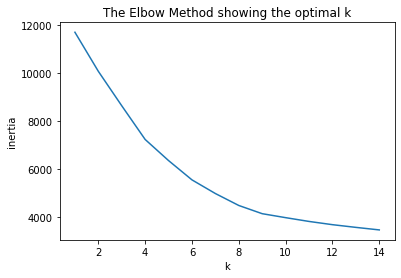

In [26]:
inertia = []
k = range(1, 15)
for k_i in k:
    km = KMeans(
                n_clusters   =k_i,
                n_jobs       =-1,
                random_state = 42,
                algorithm    = 'full'
                ).fit(data_class)
    km.fit(X)
    inertia.append(km.inertia_)
 
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')

[0.20354141298788947, 0.19731467300790304, 0.20763291539063786, 0.2218183739499786, 0.16261690814325241, 0.17081867045593202, 0.13543275656354772, 0.17153510706821365, 0.14042965584904113, 0.14847209815617302, 0.1400491133943022, 0.13897035071316252, 0.13326748353360815, 0.13074975655752272]


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

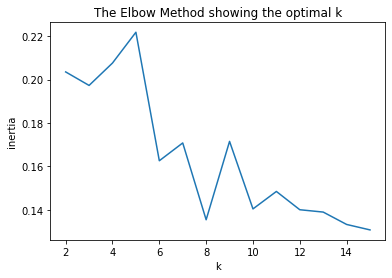

In [27]:
inertia = []
k = range(2, 16)
for k_i in k:
    km = KMeans(
                n_clusters   =k_i,
                n_jobs       =-1,
                random_state = 42,
                algorithm    = 'full'
               ).fit(X)
    km.fit(data_class)
    inertia.append(silhouette_score(X, km.labels_))

print(inertia)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')

По метрики *инерции* не видно, где происходит изгиб функции. Где-то в районе 5-ти или 6-ти. Зато по метрики *силуэта* это хорошо заметно. Количество кластеров равно 5-ти.  

**Adjusted Rand Index**  

Text(0.5, 1.0, 'ARI metric k')

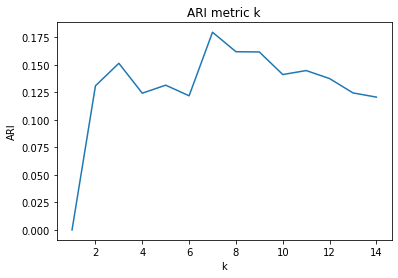

In [28]:
ari = []
k = range(1, 15)
for k_i in k:
    km = KMeans(
                n_clusters   =k_i,
                n_jobs       =-1,
                random_state = 42,
                algorithm    = 'full'
                ).fit(data_class)
    km.fit(data_class)
    ari.append(adjusted_rand_score(km.labels_, y))
plt.plot(k, ari)
plt.xlabel('k')
plt.ylabel('ARI')
plt.title('ARI metric k')

**Adjusted Mutual Information**

Text(0.5, 1.0, 'AMI metric k')

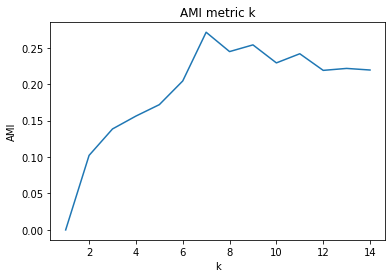

In [29]:
ami = []
k = range(1, 15)
for k_i in k:
    km = KMeans(
                n_clusters   =k_i,
                n_jobs       =-1,
                random_state = 42,
                algorithm    = 'full'
                ).fit(data_class)
    km.fit(data_class)
    ami.append(adjusted_mutual_info_score(km.labels_, y))
 
plt.plot(k, ami)
plt.xlabel('k')
plt.ylabel('AMI')
plt.title('AMI metric k')

### 5.3.2 Hierarchical Clustering Model

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

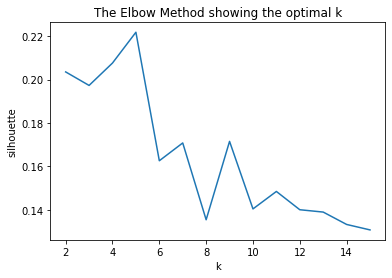

In [30]:
silhouette = []
k = range(2, 16)
for k_i in k:
    hierar=AgglomerativeClustering(
                                    linkage    = 'ward',
                                    n_clusters =k_i, 
                                    affinity   ='euclidean'
                                    ).fit(X)
    silhouette.append(silhouette_score(X, hierar.labels_))
 
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.title('The Elbow Method showing the optimal k')

**Adjusted Rand Index**  

Text(0.5, 1.0, 'ARI metric k')

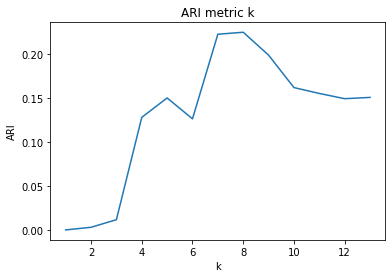

In [31]:
ari = []
k = range(1, 14)
for k_i in k:
    hierar=AgglomerativeClustering(
                                    linkage    = 'ward',
                                    n_clusters =k_i, 
                                    affinity   ='euclidean'
                                    ).fit(X)
    ari.append(adjusted_rand_score(hierar.labels_, y))
plt.plot(k, ari)
plt.xlabel('k')
plt.ylabel('ARI')
plt.title('ARI metric k')

**Adjusted Mutual Information**

Text(0.5, 1.0, 'AMI metric k')

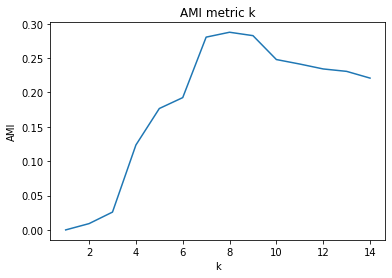

In [32]:
ami = []
k = range(1, 15)
for k_i in k:
    hierar=AgglomerativeClustering(
                                    linkage    = 'ward',
                                    n_clusters =k_i, 
                                    affinity   ='euclidean'
                                    ).fit(X)
    ami.append(adjusted_mutual_info_score(hierar.labels_, y))
 
plt.plot(k, ami)
plt.xlabel('k')
plt.ylabel('AMI')
plt.title('AMI metric k')

По метрике силуэта для иерархической кластеризации результат тот же, что и для K-mean. 5 кластеров. А вот для метрик ARI и AMI результат лучше. Оптимальное значение 8 кластеров, что ближе к действительной разметки датасета. Что интересно, при выборе критерия связывания (параметр **linkage**), лучшим оказался метод **ward**. 

### 5.3.3 Density based clustering Model

In [33]:
def dbscan_ari_grid_search(X_data, y_data, eps_space = 0.5, samples_space = 5):
    score=-1
    dbscan_clusters=[]
    labels = np.ndarray(1)
    for eps_val in eps_space:
        for samples_val in samples_space:

            dbscan_grid = DBSCAN(n_jobs      =-1,
                                 eps         = eps_val,
                                 min_samples = samples_val)
            # fit
            clusters = dbscan_grid.fit(X = X_data)
            cur_score = adjusted_rand_score(clusters.labels_, y_data)
            # Appending the lst each time n_clusters criteria is reached
            if cur_score > score :
                score=cur_score
                dbscan_clusters=[eps_val,samples_val, score]
                labels = clusters.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    # Printing grid search summary information
    print("Best hyperparameter values: eps = {}, min_samples = {}, ARI score = {}. \n".format(dbscan_clusters[0],
                                                                                              dbscan_clusters[1],
                                                                                              dbscan_clusters[2]))
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_) 

In [34]:
dbscan_ari_grid_search(X, y, np.arange(0.1, 3.0, 0.1), range(3, 25, 1))

Best hyperparameter values: eps = 1.1, min_samples = 17, ARI score = 0.044789520116394164. 

Estimated number of clusters: 2
Estimated number of noise points: 446


In [35]:
def dbscan_ami_grid_search(X_data, y_data, eps_space = 0.5, samples_space = 5):
    score=-1
    dbscan_clusters=[]
    labels = np.ndarray(1)
    for eps_val in eps_space:
        for samples_val in samples_space:

            dbscan_grid = DBSCAN(n_jobs      =-1,
                                 eps         = eps_val,
                                 min_samples = samples_val)
            # fit
            clusters = dbscan_grid.fit(X = X_data)
            cur_score = adjusted_mutual_info_score(clusters.labels_, y_data)
            # Appending the lst each time n_clusters criteria is reached
            if cur_score > score :
                score=cur_score
                dbscan_clusters=[eps_val,samples_val, score]
                labels = clusters.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    # Printing grid search summary information
    print("Best hyperparameter values: eps = {}, min_samples = {}, AMI score = {}. \n".format(dbscan_clusters[0],
                                                                                              dbscan_clusters[1],
                                                                                              dbscan_clusters[2]))
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_) 

In [36]:
dbscan_ami_grid_search(X, y, np.arange(0.1, 3.0, 0.1), range(3, 25, 1))

Best hyperparameter values: eps = 0.6, min_samples = 3, AMI score = 0.08188865137806076. 

Estimated number of clusters: 38
Estimated number of noise points: 946


DB-scan показал себя не очень хорошо. Точнее, отработал очень плохо. Возможно это связано с большой дисперсией в данных. Можно попытаться визуализировать данные и получить аргументы в пользу этой гипотезы.

### 5.3.4 Data visualization

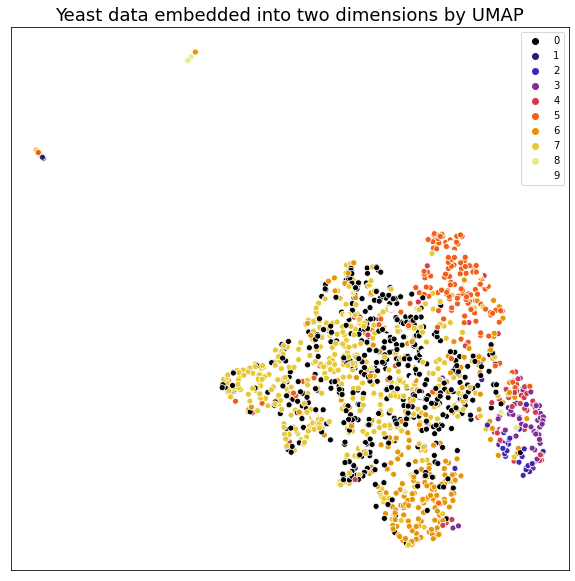

In [37]:
reducer = umap.UMAP(
                    n_neighbors=8,
                    min_dist   =0.3
                   )
embedding = reducer.fit_transform(X)
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=embedding[:, 0], 
    y=embedding[:, 1], 
    hue=y.astype(int), 
    palette="CMRmap", 
    legend='full'
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Yeast data embedded into two dimensions by UMAP", fontsize=18)

plt.show()

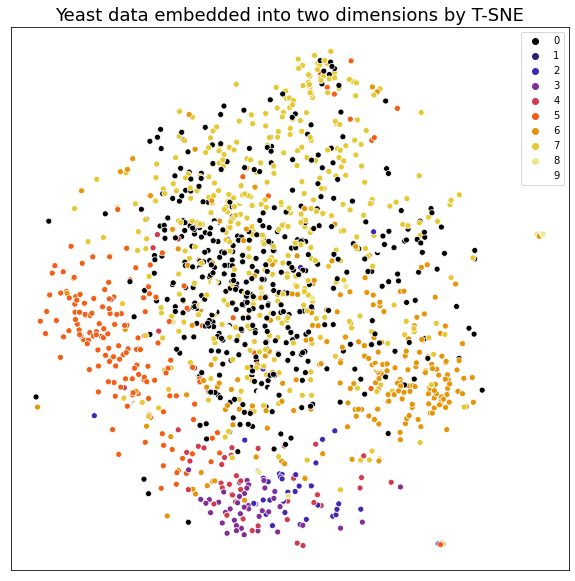

In [38]:
reducer = TSNE(perplexity=700)
embedding = reducer.fit_transform(X)
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=embedding[:, 0], 
    y=embedding[:, 1], 
    hue=y.astype(int), 
    palette="CMRmap", 
    legend='full'
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Yeast data embedded into two dimensions by T-SNE", fontsize=18)

plt.show()

# 6. Conclusion

1.	Лучше всего себя показала иерархическая кластеризация с методом связывания **ward**. На втором месте K-mean, хуже всех показал себя DB-Scan.
2.	Иерархическая кластеризация лишена недостатка K-mean, связанного со случайным выбором центройда, поэтому показала лучший результат.
3.	Плохой результат работы DB-scan, возможно, связан с большой взаимной «диффузией» кластеров. Эту гипотезу подтверждает визуализация с использованием методов уменьшения размерности.
4.	Таким образом, лучше всего для этого дата сета подходят линейные модели, которые уменьшат дисперсию внутри кластеров и не будут быстро переходить в переобучение. Например, для обучения классификации можно попробовать SVM или линейную регрессию.